# **Análisis Estadístico de Redes Sociales: Taller 2**

## Valentina Cardona Saldaña

Desarrollo de los ejercicios propuestos en el [Taller 2](https://www.dropbox.com/scl/fi/gncmfys1f4vh4jn9b9klj/Taller_2.pdf?rlkey=ak00y804yao89stj5m19nief1&e=1&dl=0) de la asignatura [Análisis Estadístico de Redes Sociales](https://sites.google.com/view/juansosa/social-networks), impartida por el profesor [Juan Sosa](https://github.com/jstats1702) como parte del programa de la Maestría en Ciencias - Estadística de la Universidad Nacional de Colombia.

In [1]:
# Paquetes
import pandas as pd
import numpy as np
import random
import rdata

import igraph as ig
#import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Ejercicio 1

Reproducir los ejemplos 3.1, 3.2, 5.2, 5.3, 6.1 de [Conceptos fundamentales de teoría de grafos](https://rpubs.com/jstats1702/1126816) en Python usando igraph y/o NetworkX

#### 3.1 Ejemplo: Vecinos y Grado

In [2]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


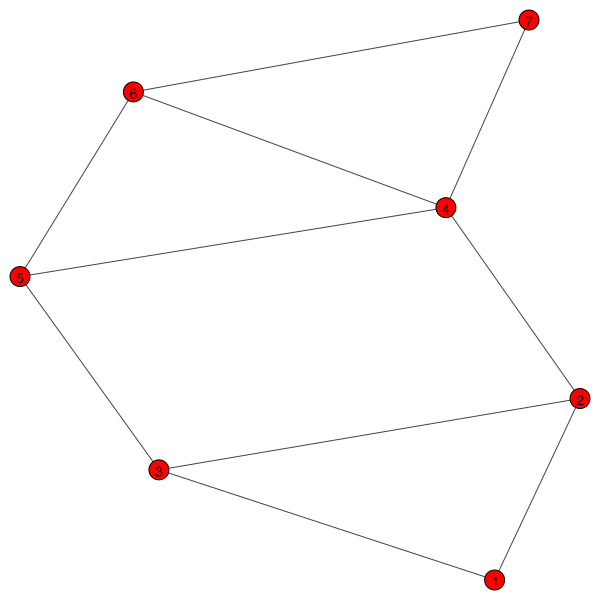

In [3]:
# visualización
random.seed(10)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [4]:
# vecinos del vértice 1
g.neighborhood(0) ## Se introduce el ID del vértice

## Arroja una lista que incluye al mismo vértice de primeras

[0, 1, 2]

In [5]:
# grados

## Imprimir lista de vértices
print(g.vs['name'])

## El grado de cada vértice
print(g.degree())

['1', '2', '3', '4', '5', '6', '7']
[2, 3, 3, 4, 3, 3, 2]


#### 3.2 Ejemplo: Grado de entrada y Grado de salida

In [6]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


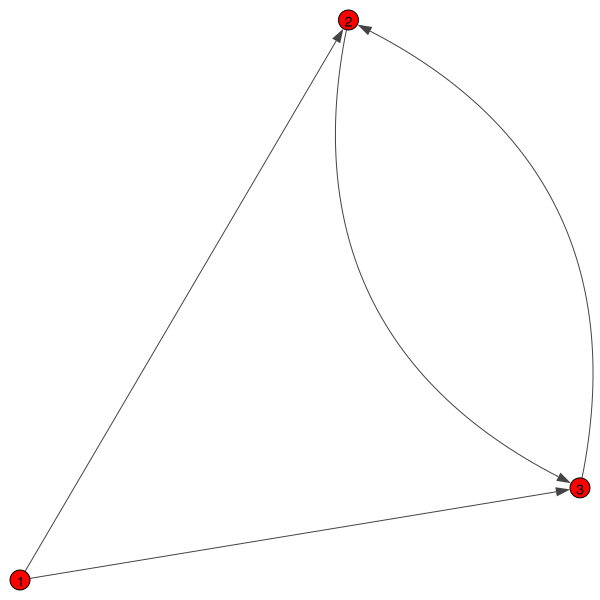

In [7]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg)

In [8]:
# grado de entrada

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.indegree())

['1', '2', '3']
[0, 2, 2]


In [9]:
# grado de salida

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.outdegree())

['1', '2', '3']
[2, 1, 1]


#### 5.2 Ejemplo: Componentes

In [10]:
# red no dirigida
g = ig.Graph(edges = [[1,7], [2,7], [2,4], [3,6], [4,7], [5,11], [6,12], [7,8], [7,9], [7,10]])

## Agregar nombres a red
g.vs['name'] = range(g.vcount()+1)
## Eliminar vértice 0
g.delete_vertices(0)

## Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


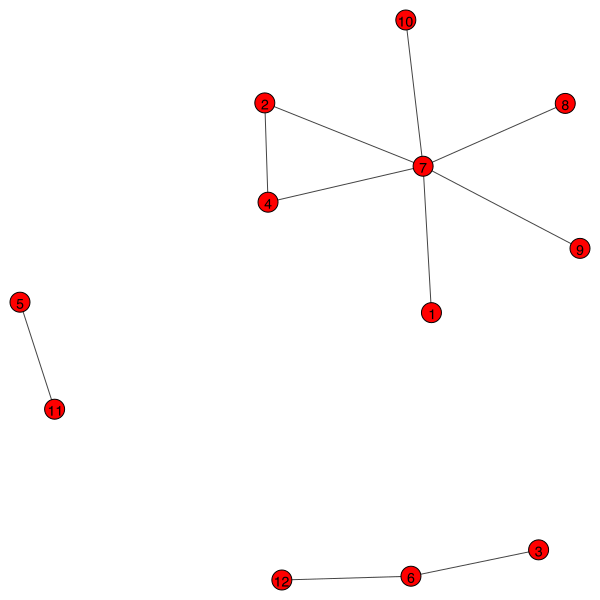

In [11]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [12]:
# conectado?
g.is_connected()

False

In [13]:
# componentes
components = g.connected_components()

print(components.summary(), end = "\n\n")

# membership
c = components.membership
print("membership")
print(g.vs['name'])
print(c, end = "\n\n")

# csize
print("csize")
print(components.sizes(), end = "\n\n")

# n
print("num")
print(components.__len__())

Clustering with 12 elements and 3 clusters

membership
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1]

csize
[7, 3, 2]

num
3


#### 5.3 Ejemplo: Conexión débil y fuerte

In [14]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


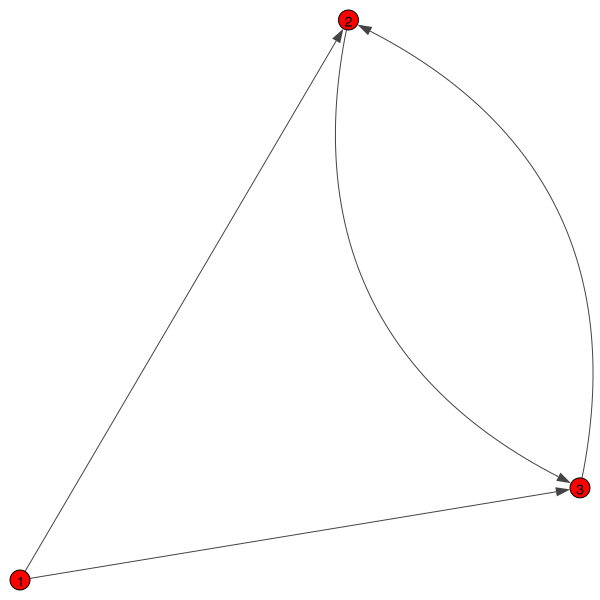

In [15]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg)

In [16]:
# conectado débilmente?
dg.is_connected(mode = "weak")

True

In [17]:
# conectado fuertemente?
dg.is_connected(mode = "strong")

False

#### 6.1 Ejemplo: Distancias

In [18]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


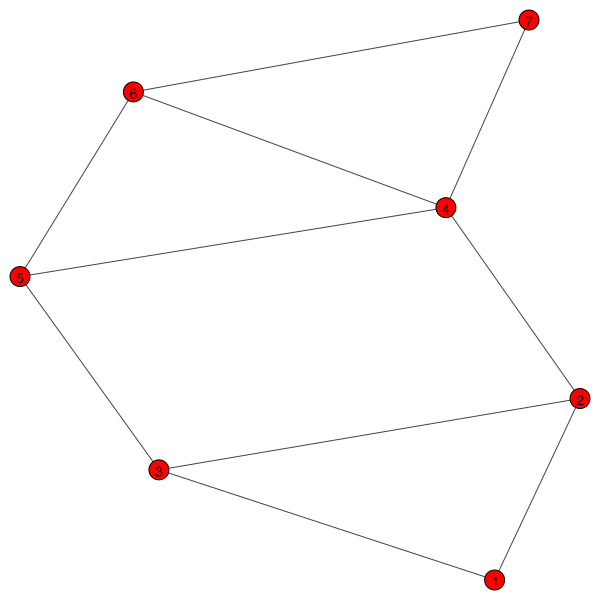

In [19]:
# visualización
random.seed(10)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [20]:
# distancia
g.distances(source = "1", target = "6")

[[3]]

In [21]:
# caminata

## vertex ID
print(g.get_shortest_paths(v = "1", to = "6"), end = "\n\n")

## nombres (sumar 1)
print(np.array(g.get_shortest_paths(v = "1", to = "6")) + 1)

[[0, 1, 3, 5]]

[[1 2 4 6]]


In [22]:
# caminatas

## vertex ID
print(g.get_all_shortest_paths(v = "1", to = "6"), end = "\n\n")

## nombres (sumar 1)
print(np.array(g.get_all_shortest_paths(v = "1", to = "6")) + 1)

[[0, 2, 4, 5], [0, 1, 3, 5]]

[[1 3 5 6]
 [1 2 4 6]]


In [23]:
# distancias
D = g.distances()
D

[[0, 1, 1, 2, 2, 3, 3],
 [1, 0, 1, 1, 2, 2, 2],
 [1, 1, 0, 2, 1, 2, 3],
 [2, 1, 2, 0, 1, 1, 1],
 [2, 2, 1, 1, 0, 1, 2],
 [3, 2, 2, 1, 1, 0, 1],
 [3, 2, 3, 1, 2, 1, 0]]

In [24]:
# diámetro
g.diameter()

3

In [25]:
# diámetro (otra manera)
D = np.array(D)
np.max(np.tril(D, k = -1))

3

In [26]:
# sendero del diámetro
d = g.get_diameter()
d

## vertex ID
print(d, end = "\n\n")

## nombres (sumar 1)
print(np.array(d) + 1)

[0, 1, 3, 5]

[1 2 4 6]


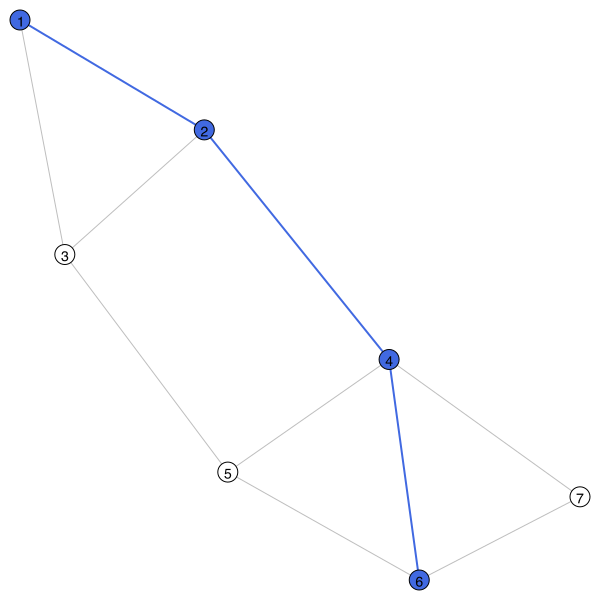

In [27]:
# visualización del diámetro

random.seed(10)

## Convertir los ID de vértices a nombres
vertex_names = [v["name"] for v in g.vs]
diameter_names = [vertex_names[i] for i in d]

## Visualización del diámetro
g.vs["color"] = "white"
g.es["color"] = "grey"
g.es["width"] = 1
g.vs[d]["color"] = "royalblue"

## Obtener los índices de las aristas que están en el camino del diámetro
path_edges = [(d[i], d[i+1]) for i in range(len(d) - 1)]

## Marcar las aristas en el camino del diámetro
for edge in path_edges:
    edge_index = g.get_eid(edge[0], edge[1])
    g.es[edge_index]["color"] = "royalblue"
    g.es[edge_index]["width"] = 2

ig.plot(g, layout = "fr", vertex_label = g.vs["name"])

In [28]:
# distancia geodésica promedio
g.average_path_length()

1.6666666666666667

In [29]:
# distancia geodésica promedio (otra manera)
np.mean(D[np.tril(np.ones(D.shape), k=-1).astype(bool)])

1.6666666666666667

In [30]:
# distribución de las distancias
dist = g.path_length_hist()

## Lo que hay dentro del objeto
print(dist.__dict__, end = "\n\n")

## $res
print(dist._bins, end = "\n\n")

## $unconnected
print(dist.unconnected, end = "\n\n")

{'_bin_width': 1.0, '_bins': [10, 8, 3], '_min': 1.0, '_max': 4.0, '_running_mean': RunningMean(n=21, mean=1.6666666666666667, sd=0.7302967433402215), 'unconnected': 0}

[10, 8, 3]

0



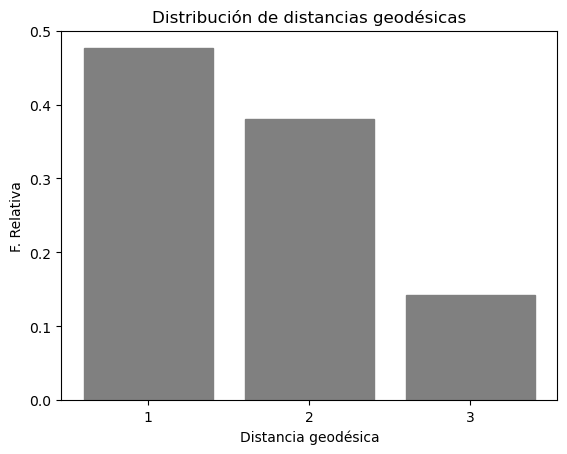

In [31]:
# visualización
senderos = dist._bins

## Asignar nombres a los elementos de la lista
senderos_names = ["1", "2", "3"]

## Crear un gráfico de barras
plt.bar(senderos_names, np.array(senderos) / sum(senderos), color = 'grey', edgecolor = 'grey')

## Configurar etiquetas y título
plt.xlabel('Distancia geodésica')
plt.ylabel('F. Relativa')
plt.title('Distribución de distancias geodésicas')

## Mostrar el gráfico de barras
plt.show()

### Ejercicio 2

La solución para el ejercicio 2, que requería una demostración matemática, se encuentra detallada en el informe correspondiente al taller titulado [Redes - Taller 2 - Valentina Cardona.pdf](). Por favor, consulte dicho informe para más detalles.

### Ejercicio 3


### Ejercicio 4

### Ejercicio 5

### Ejercicio 6

### Ejercicio 7

### Ejercicio 8

### Ejercicio 9